In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('TravelInsurancePrediction.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [7]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
text = df.select_dtypes(include = 'object').columns
float1 = df.select_dtypes(exclude = 'object').columns
display(float1, text)

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [9]:
for col in text:
    print(col,'\n', df[col].unique())

Employment Type 
 ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot 
 ['Yes' 'No']
FrequentFlyer 
 ['No' 'Yes']
EverTravelledAbroad 
 ['No' 'Yes']


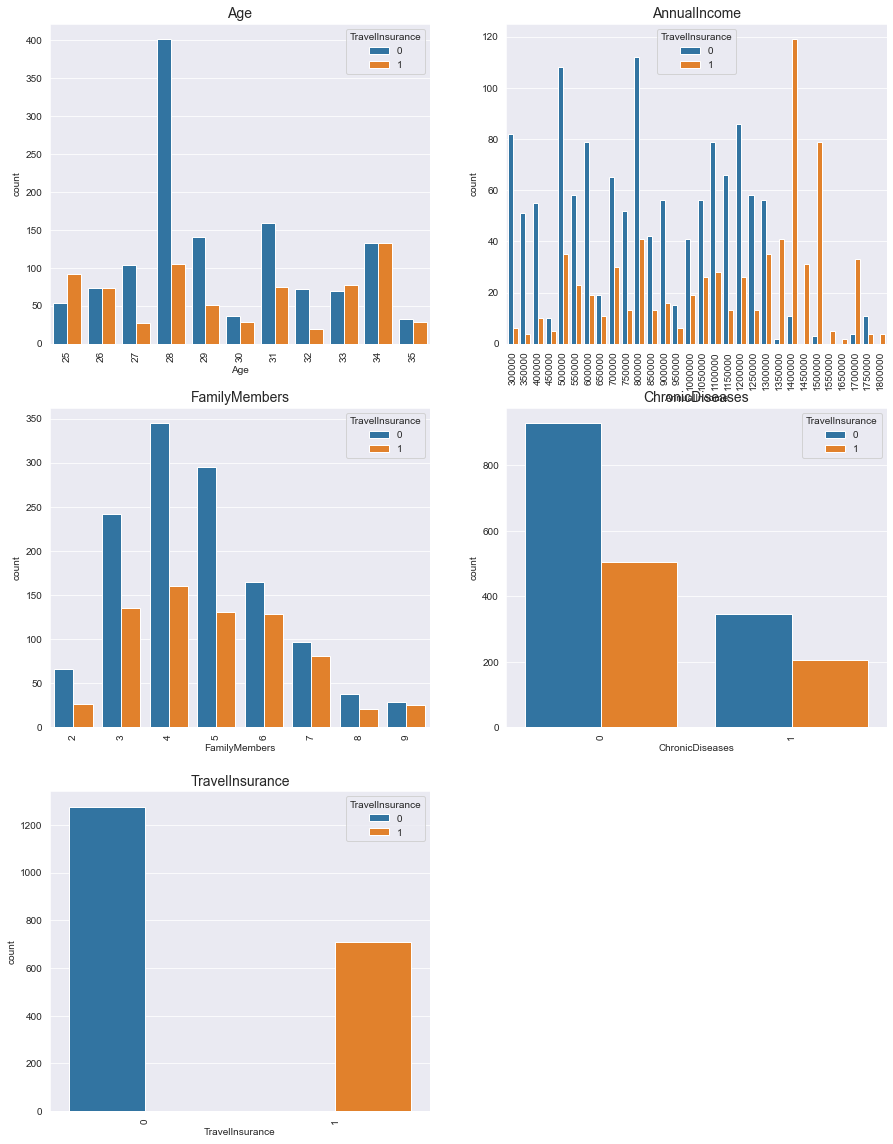

In [16]:
plt.figure(figsize=(15,20))
i = 1
for col in float1:
    plt.subplot(3,2,i)
    sns.countplot(x = col, data = df, hue = 'TravelInsurance')
    plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

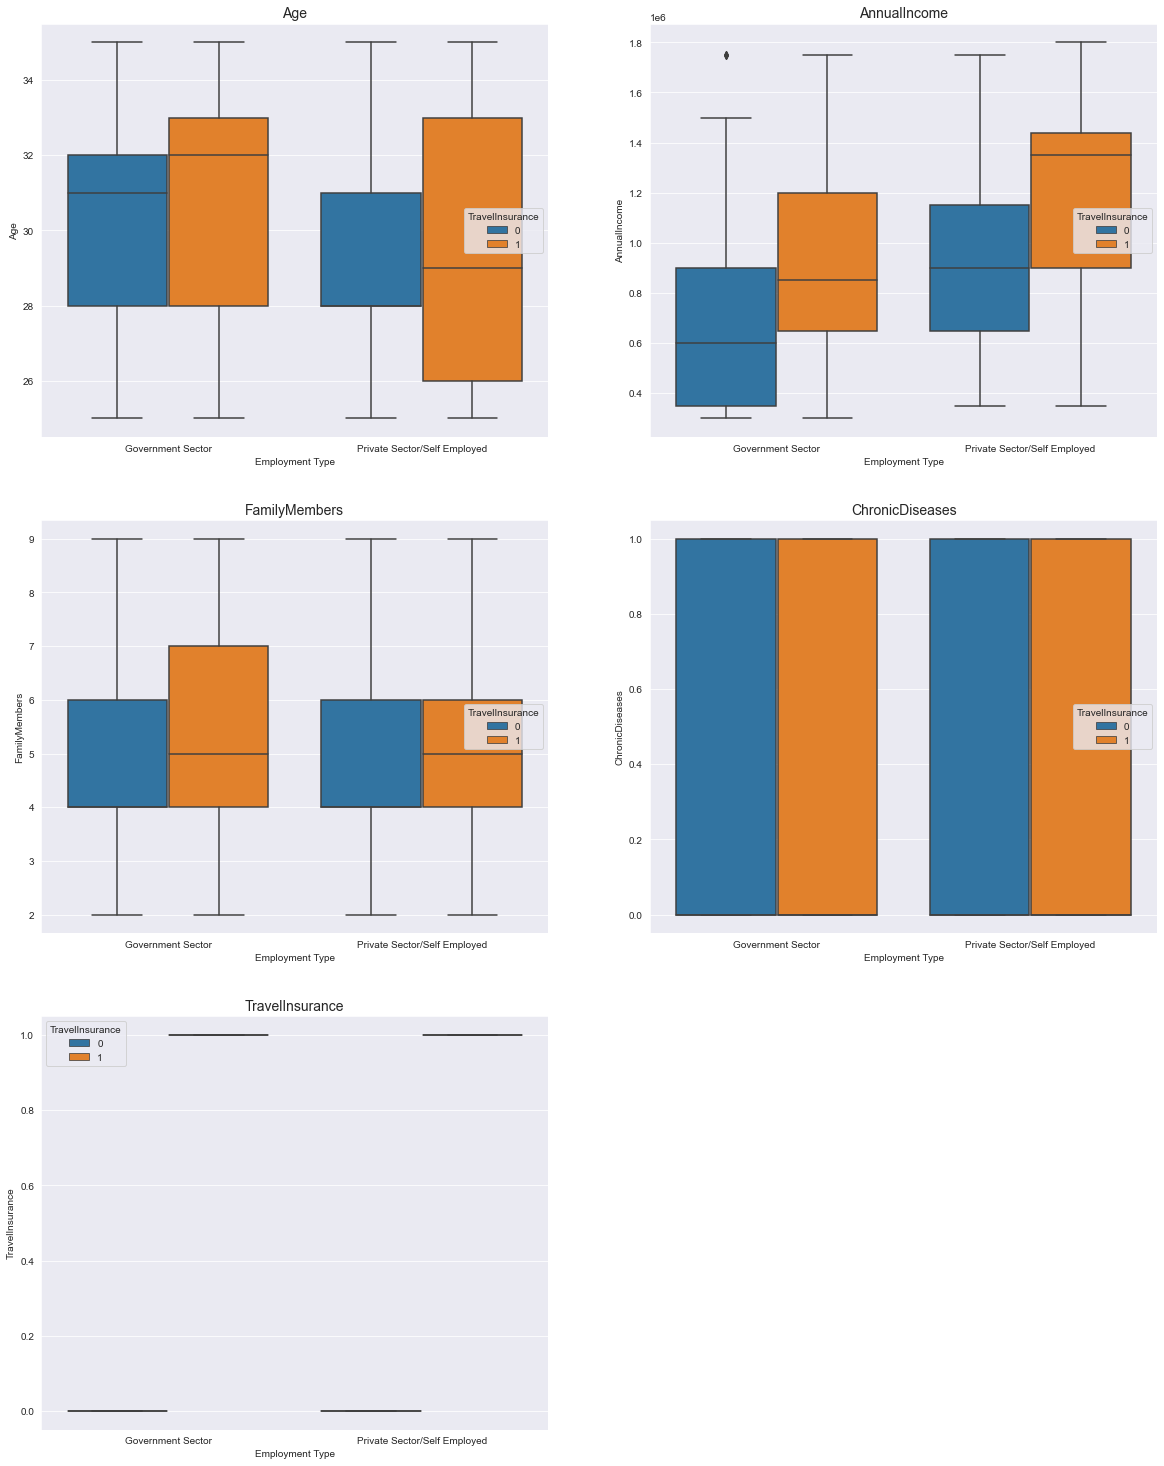

In [17]:
plt.figure(figsize=(20,35))
i = 1
for col in float1:
    plt.subplot(4,2,i)
    sns.boxplot(x = 'Employment Type', y = col, data = df, hue = 'TravelInsurance')
    #plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

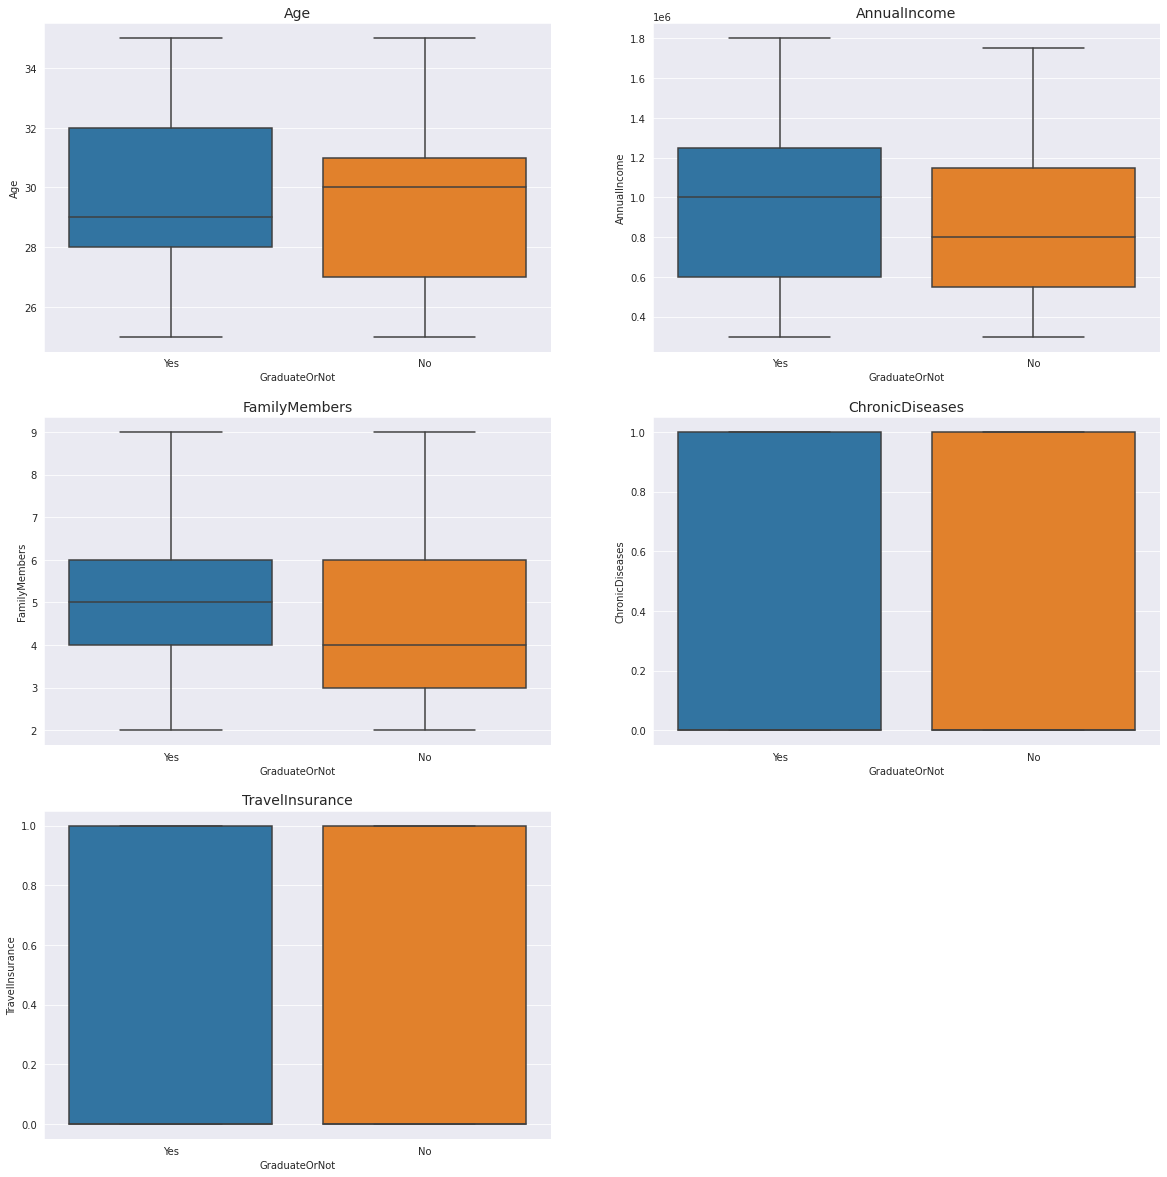

In [11]:
plt.figure(figsize=(20,35))
i = 1
for col in float1:
    plt.subplot(5,2,i)
    sns.boxplot(x = 'GraduateOrNot', y = col, data = df)
    #plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

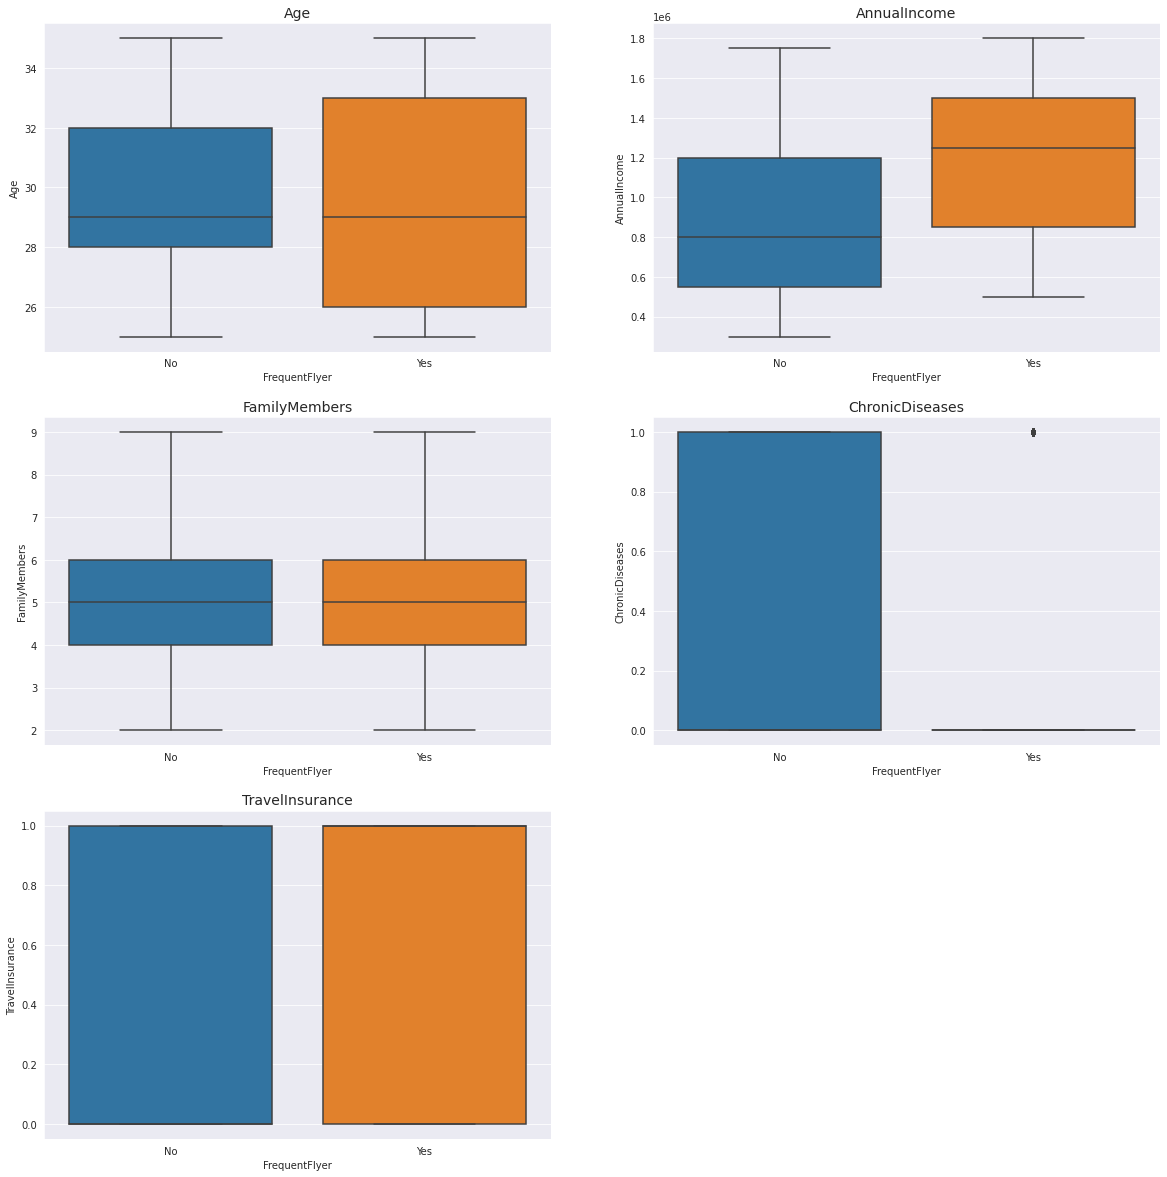

In [12]:

plt.figure(figsize=(20,35))
i = 1
for col in float1:
    plt.subplot(5,2,i)
    sns.boxplot(x = 'FrequentFlyer', y = col, data = df)
    #plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

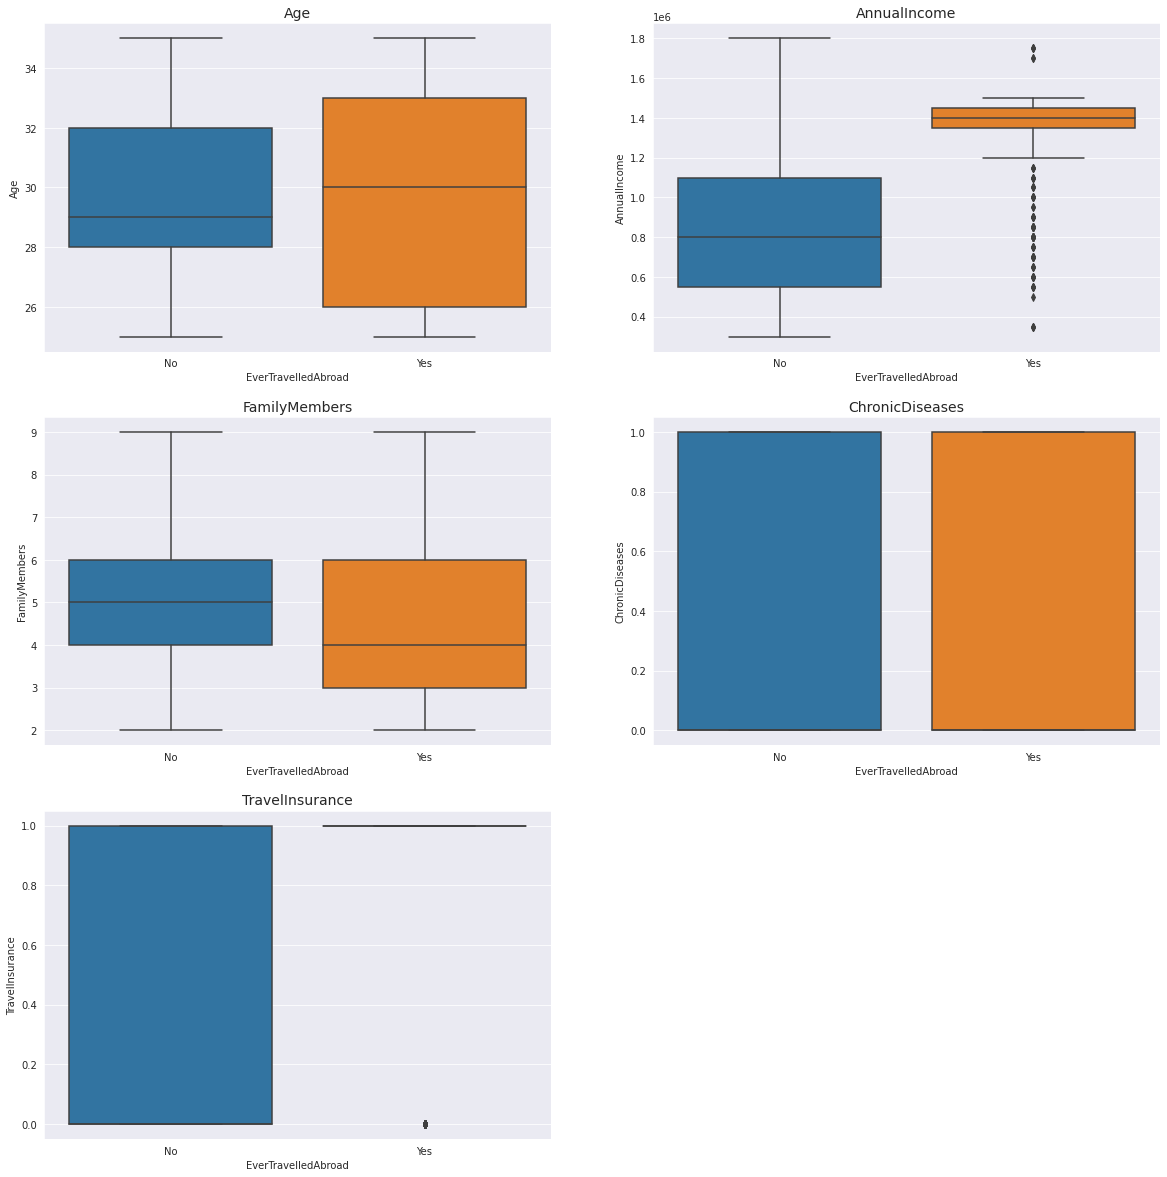

In [13]:
plt.figure(figsize=(20,35))
i = 1
for col in float1:
    plt.subplot(5,2,i)
    sns.boxplot(x = 'EverTravelledAbroad', y = col, data = df)
    #plt.xticks(rotation = 90)
    plt.title(df[col].name, fontsize = 14)
#    plt.show()
    i+=1

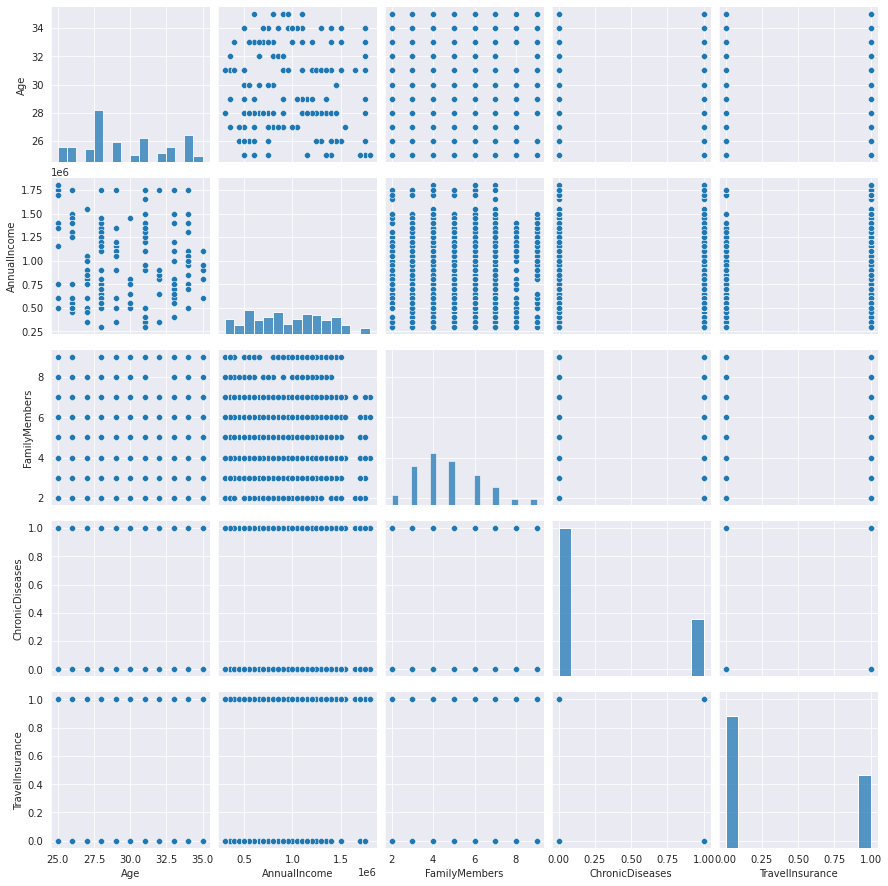

In [14]:
sns.pairplot(vars = (float1), data = df)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()


In [16]:
for i in text:
    df[i] = le.fit_transform(df[i])

In [17]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [18]:
x = df.drop(['TravelInsurance'], axis = 1)
y = df.TravelInsurance
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [19]:
#X_train = sc.fit(X_train)
#X_test = sc.transform(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score , plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
rf = RandomForestClassifier()
ad = AdaBoostClassifier(base_estimator =rf)
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
gnb = GaussianProcessClassifier()
svc = SVC()
mlp = MLPClassifier()
gb = GradientBoostingClassifier()
sgd = SGDClassifier()
dt = DecisionTreeClassifier()
et = ExtraTreeClassifier()
ets = ExtraTreesClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
rn = RadiusNeighborsClassifier()

In [21]:
models = [dt, et, ets, rf, knn, ad, gnb,svc, gb,sgd,mlp]
for model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accu = accuracy_score(ytest, ypred)
    #scores = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(model,'\n', 'accuracy score:', accu,'\n')

DecisionTreeClassifier() 
 accuracy score: 0.7537688442211056 

ExtraTreeClassifier() 
 accuracy score: 0.7613065326633166 

ExtraTreesClassifier() 
 accuracy score: 0.7788944723618091 

RandomForestClassifier() 
 accuracy score: 0.7964824120603015 

KNeighborsClassifier() 
 accuracy score: 0.8015075376884422 

AdaBoostClassifier(base_estimator=RandomForestClassifier()) 
 accuracy score: 0.7663316582914573 

GaussianProcessClassifier() 
 accuracy score: 0.8115577889447236 

SVC() 
 accuracy score: 0.7638190954773869 

GradientBoostingClassifier() 
 accuracy score: 0.8341708542713567 

SGDClassifier() 
 accuracy score: 0.3793969849246231 

MLPClassifier() 
 accuracy score: 0.6206030150753769 

